## Trabalho de Aprendizagem de Máquina
##### Carlos César de Oliveira Fonseca

Para esse trabalho eu escolhi a base de dados de Diagnostico de Cancer de Mama de Wisconsin, nesse primeiro momento usarei o Python para fazer a análise dos dados. Encontrei a base em https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import formulas as fo #Formulas utilizadas...

In [2]:
df = pd.read_csv('cancer.csv')
df2 = df.copy() # df2 é para descobrir a correlação com as outras variáveis.
df2['diagnosis'] = df2['diagnosis'].replace('M', 1)
df2['diagnosis'] = df2['diagnosis'].replace('B', 0)
df2.diagnosis.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Com as duas tabelas acima, podemos ver que todos os valores estão preenchidos, além de que temos uma variável 'diagnosis' que é um vetor de fatores 'B' ou 'M' que queremos prever e outras 10 variáveis quantitativas que podemos utilizar para prever o Y.

Fazendo uma descrições dos dados.

- id seria o identificador do paciente
    - totalmente irrelevante



- diagnosis seria o diagnóstico
    - se 'M' >>> Maligno 
    - se 'B' >>> Benigno
        - Output

- Inputs:

    - Radius seria o raio do tumor

    - Texture seria a textura (desvio padrão dos valores de escala de cinza)

    - Perimeter seria o perimetro.
    
    - Area seria a area.

    - Smothness seria a suavidade (variação local nos comprimentos dos raios)

    - Compactness seria a compacidade ($\frac{perímetro^2}{área} - 1,0$)

    - Concavity seria a  concavidade (gravidade das porções côncavas do contorno)

    - Concave Points seria os pontos côncavos (número de porções côncavas do contorno)

    - Symmetry seria a simetria

    - Fractal Dimension seria a dimensão fractal
    
### Output

A variável a ser prevista é a 'Diagnosis'. Então vamos ver como é a sua distribuição e como ela se encontra nos dados.

In [4]:
df.groupby(by=['diagnosis']).size()

diagnosis
B    357
M    212
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

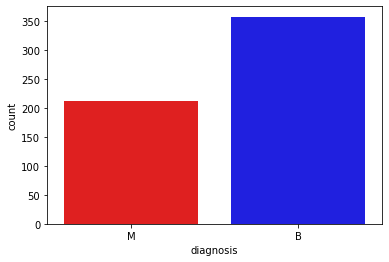

In [5]:
sns.countplot(x='diagnosis',data=df,palette=['red','blue'])

Então, é visível que os tumores, na maioria das vezes é Benigno, sendo que entre o total dos 569 casos observados, 357 são desse modo e os outros 212 são Malignos.

### Input

A seguir, está a quantificação das variáveis de Input.

In [6]:
df.describe().iloc[:,1:7]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


In [7]:
df.describe().iloc[:,7:]

,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000
mean,0.088799,0.048919,0.181162,0.062798
std,0.079720,0.038803,0.027414,0.007060
min,0.000000,0.000000,0.106000,0.049960
25%,0.029560,0.020310,0.161900,0.057700
50%,0.061540,0.033500,0.179200,0.061540
75%,0.130700,0.074000,0.195700,0.066120
max,0.426800,0.201200,0.304000,0.097440


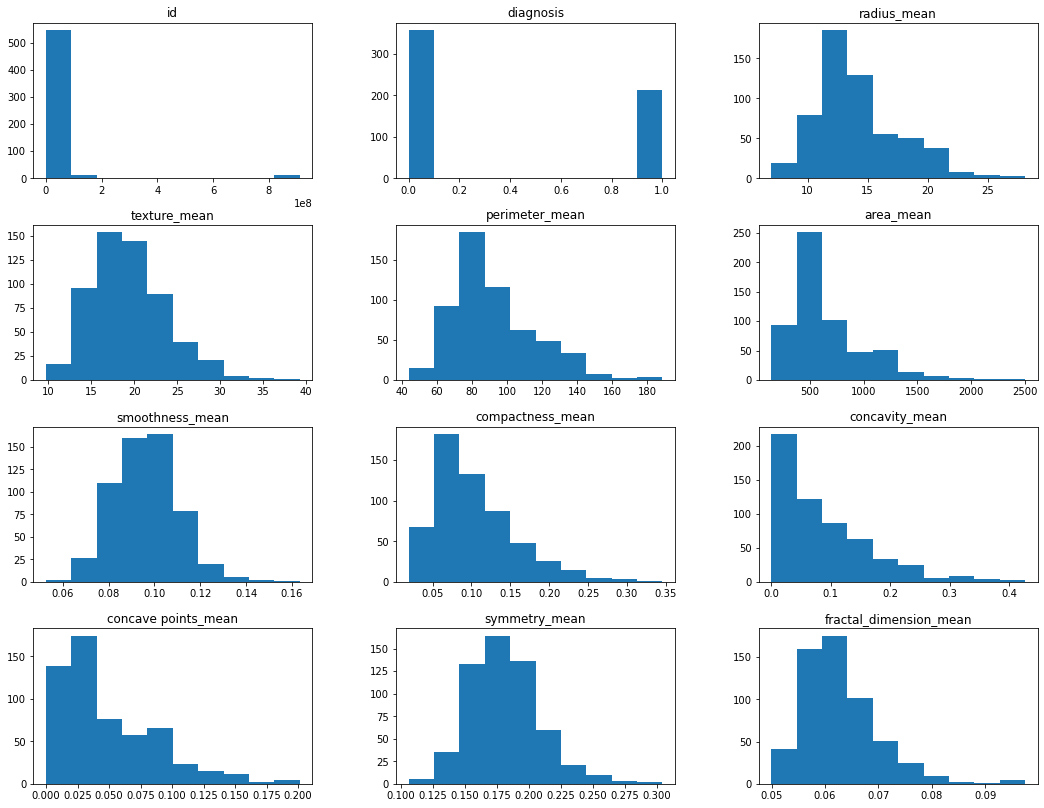

In [8]:
df2.hist(bins=10,figsize=(18,14),grid=False)
plt.show()

Após analisar as tabelas e os gráficos acima, chega se a conclusão que apesar da diferença entre o tamanho dos valores e das diferentes distribuições das variaveis, os dados estão de acordo.
Foi feita uma matriz de correlação para ter uma melhor noção de como as variaveis de Input se relacionavam entre si, e obteve-se:

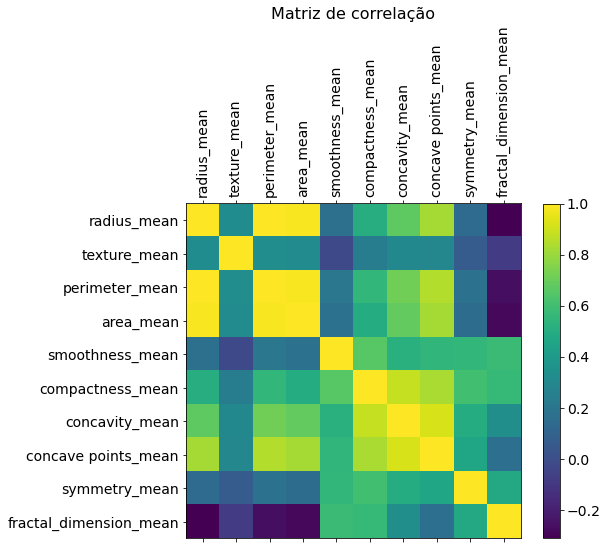

In [9]:
fo.matrix(df)

É notável que a variável 'radius', 'perimeter' e 'area' são altamente coorelacionadas, de fato era de se esperar isso, pois o perímetro e a area são funções do raio.

### Correlação entre os Inputs e o Output

Pode-se explorar alguns dados mais a fundo, para isso, é útil utilizar uma a correlação com a variável de Output. Para tal faz-se a correlação da variável de saída com as outras variáveis e pegamos as maiores correlações.

<AxesSubplot:xlabel='0', ylabel='index'>

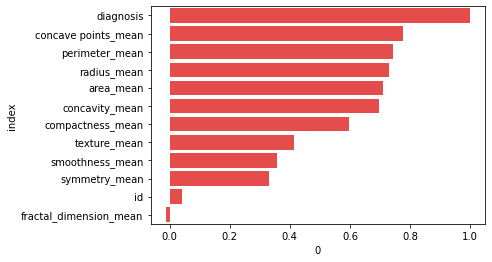

In [10]:
corre = df2.corrwith(df2["diagnosis"]).reset_index().sort_values(by=0,ascending=False).reset_index()
sns.barplot(data = corre, y='index',x=0,color='#FF3232')

 Pegando as 5 variáveis que tem maior correlação com o Output e fazendo a distribuição delas separando pelas classes do 'diagnosis' obtem-se:

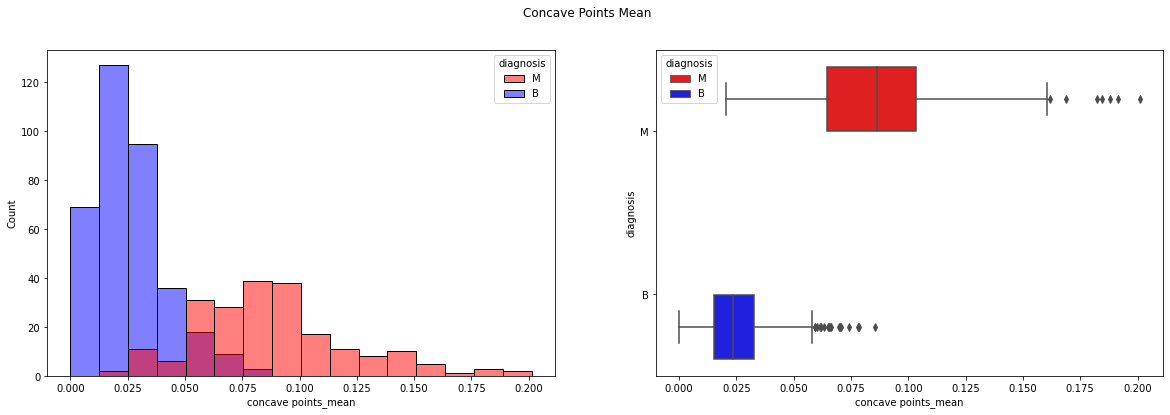

In [11]:
fo.faz_grafico(df,corre['index'][1])

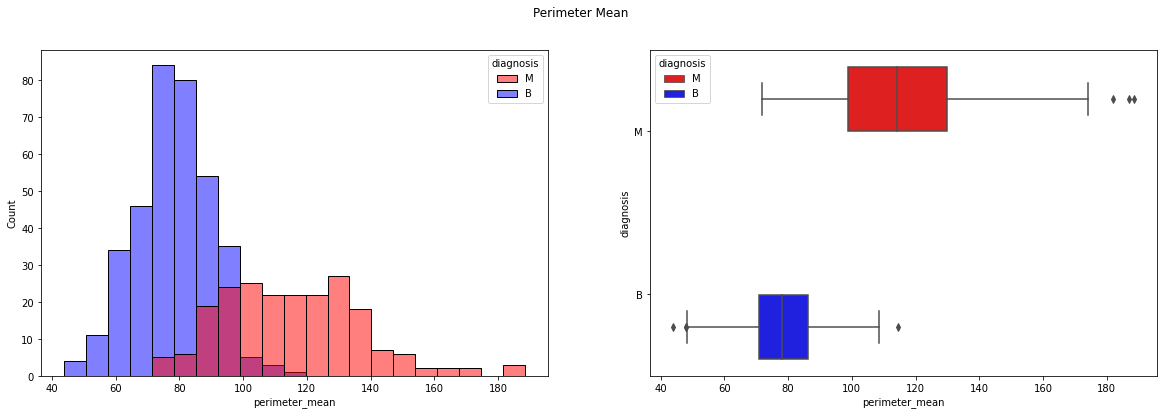

In [12]:
fo.faz_grafico(df,corre['index'][2])

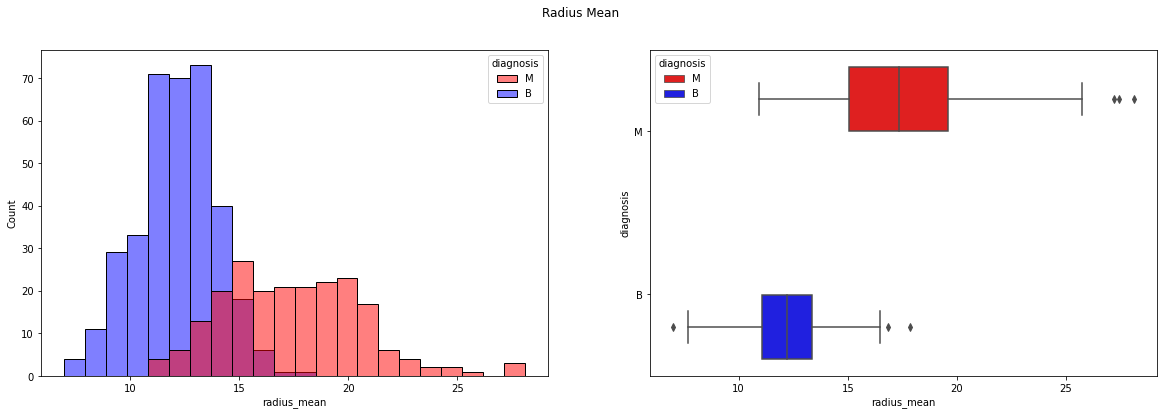

In [13]:
fo.faz_grafico(df,corre['index'][3])

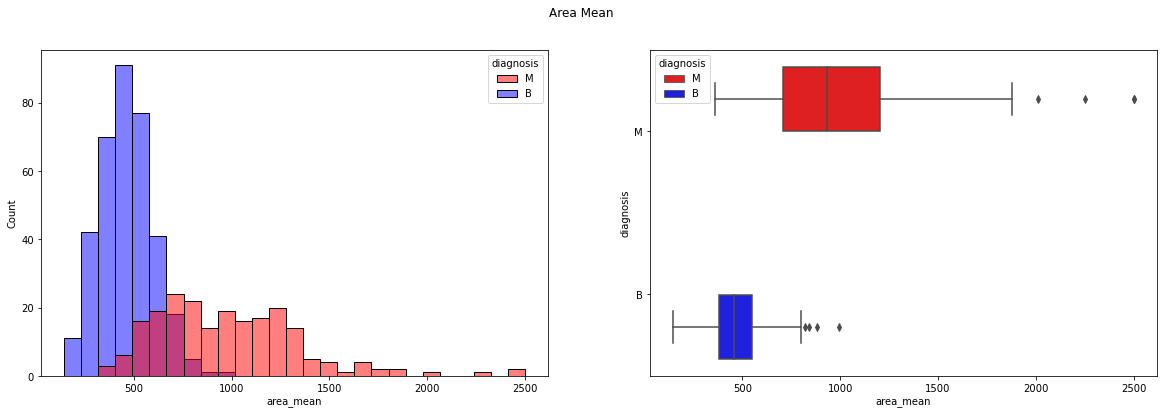

In [14]:
fo.faz_grafico(df,corre['index'][4])

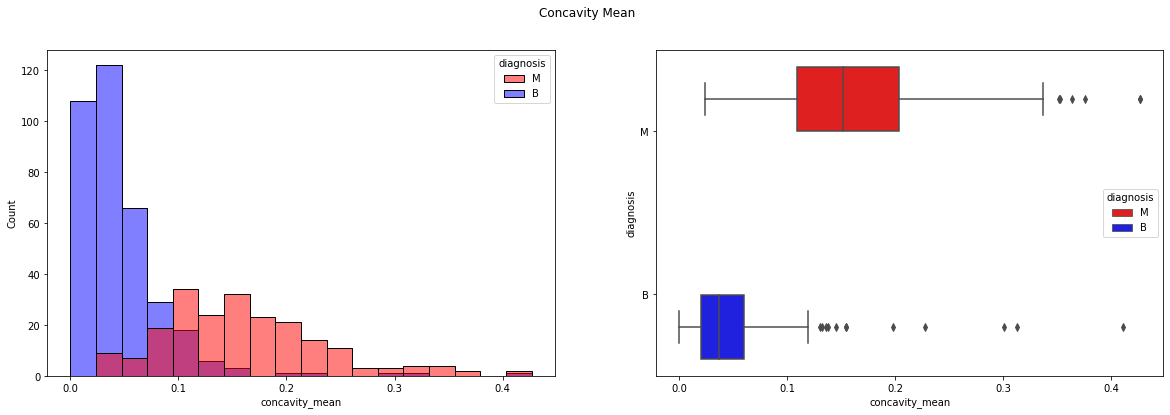

In [15]:
fo.faz_grafico(df,corre['index'][5])

Pode se observar que em ambos os casos, os valores de benignos se agrupam nas areas com os valores menores, enquanto as malignas estão nas regiões mais altas da reta. 

### Objetivo

Tendo feito análise dos dados, chegou a hora de definir o objetivo. Então a maior questão é "Prever, tendo os dados de input, se um tumor é maligno ou benigno." 


#### Observação




O notebook, os dados e os códigos estão em https://github.com/CarCesar/ML/tree/main 